# Лабораторная работа №1
## Сравнение различных подходов к хешированию

Седунов Илья,<br>
Альперович Вадим,<br>
17ПМИ


**Целью данной работы является сравнение различных методов борьбы с коллизиями:**

1) Метод цепочек;

2) Метод открытой адресации (см. Кормен, 3-е издание, 11.4 Открытая адреация);

3) Метод кукушки (см. https://en.wikipedia.org/wiki/Cuckoo_hashing).

4) Для интереса, предлагается также сделать сравнения со стандартными средствами языка c++: std::map, std::hash_map. Вдруг получится их обогнать.

**Замечание:** В качестве хеш-функций используйте только функции из универсальных
семейств, про них рассказывалось на семинарах. Список универсальных хеш-функций
можно найти здесь https://en.wikipedia.org/wiki/Universal_hashing.


**Что измеряется?**

1) Время вставки;

2) Время удаления;

3) Время поиска.


**Более конкретно об измерении:**

Нужно выбрать какое-то стартовое значение N, скажем 100, выбрать шаг step, скажем пусть
step = 100, и выбрать максимальное значение, скажем 100 000. После чего нужно для каждого
N с шагом step от минимального значения до максимального построить таблицу размера N
(из случайных элементов, или сделать выборку из заранее подготовленной базы) и
произвести одну или несколько операций (если несколько, скажем 10, то нужно усреднить).
Измеряем именно время одной операции. Некоторые допускают ошибку и делают N вставок
с замером времени, но не понятно, что в итоге Вы измерили

**Входные данные:**

a) Случайные натуральные числа.

б) Случайные вектора или строки.

с) Очень бы хотелось увидеть как поведут себя таблицы на real life данных, например на
словарях или словах какого нибудь литературного произведения.

**Ваш вывод должен содержать:**

1) График зависимости скорости вставки от количества элементов в таблице;

2) График зависимости скорости удаления от количества элементов в таблице;

3) График зависимости скорости поиска от количества элементов в таблице;

На каждом графике должно быть несколько кривых, по одной или больше для каждого
подхода. Заметим также, что таблицы из подходов 1) и 2) имеют дополнительный параметр m
– ёмкость таблицы. Хорошо бы построить на графиках кривые для разных значений m,
например m = 2n, m = n, m = ½ n. Но это не обязательно.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
performanceIntegerM2N = pd.read_csv('data/output/integerPerformanceM2N.csv')

In [4]:
performanceInteger

,TableSize,DataSize,insertLinkedTime,searchLinkedTime,deleteLinkedTime,insertOpenedTime,searchOpenedTime,deleteOpenedTime
0,100,50,0.30,0.06,0.16,0.36,0.32,0.32
1,200,100,0.28,0.04,0.16,0.32,0.14,0.14
2,300,150,0.28,0.06,0.16,0.22,0.12,0.12
3,400,200,1.20,0.06,0.16,0.46,0.18,0.16
4,500,250,0.20,0.06,0.16,0.22,0.10,0.14
...,...,...,...,...,...,...,...,...
995,99600,49800,0.12,0.04,0.18,0.40,0.10,0.10
996,99700,49850,0.14,0.04,0.18,0.30,0.14,0.14
997,99800,49900,0.14,0.04,0.18,0.28,0.10,0.10
998,99900,49950,0.14,0.06,0.18,0.28,0.06,0.06


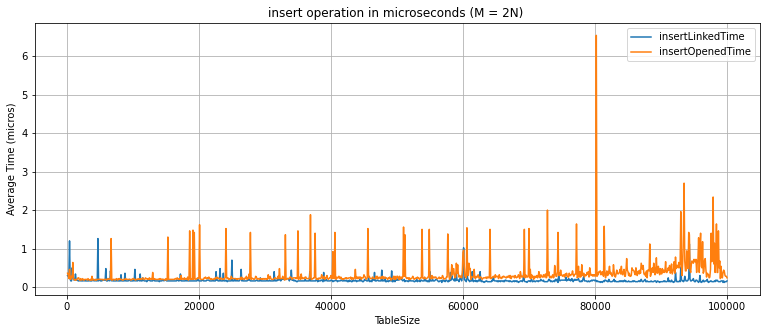

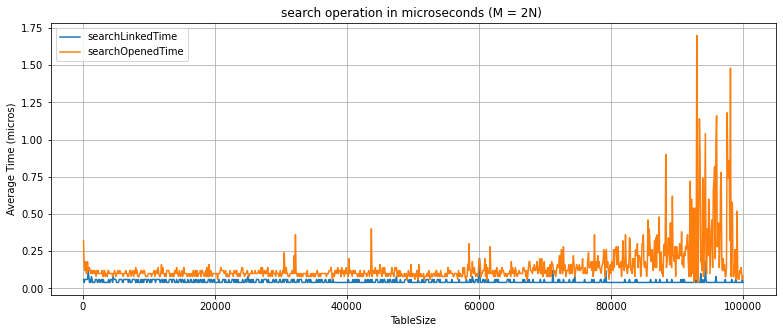

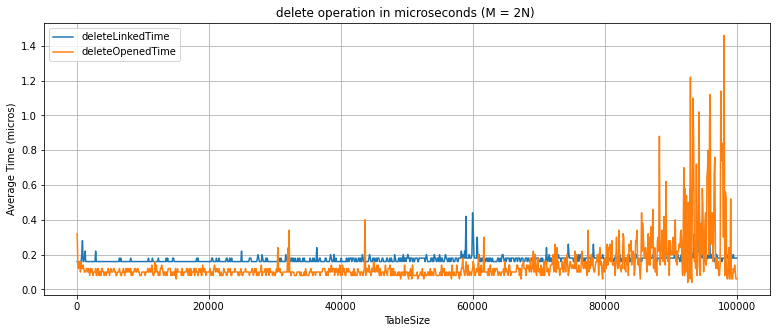

In [24]:
groups = {'insert': ['insertLinkedTime', 'insertOpenedTime'],
          'search': ['searchLinkedTime', 'searchOpenedTime'],
          'delete': ['deleteLinkedTime', 'deleteOpenedTime']
         }
for group in groups.keys():
    performanceInteger.plot(x='TableSize', 
                            y=groups[group], 
                            grid=True,
                            figsize=(13, 5)
                           )
    plt.title(group + ' operation in microseconds (M = 2N) ')
    plt.ylabel('Average Time (micros)')
    pass